In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ImportError: DLL load failed while importing _path: Impossível localizar o módulo especificado.

In [84]:
# Importar o ficheiro
df = pd.read_csv('C:\\Users\\guilh\\Desktop\\AASE\\Projeto\\csv\\train.csv', sep=";", header=0)

C:\Users\guilh\AppData\Local\Temp\ipykernel_17012\2207103995.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


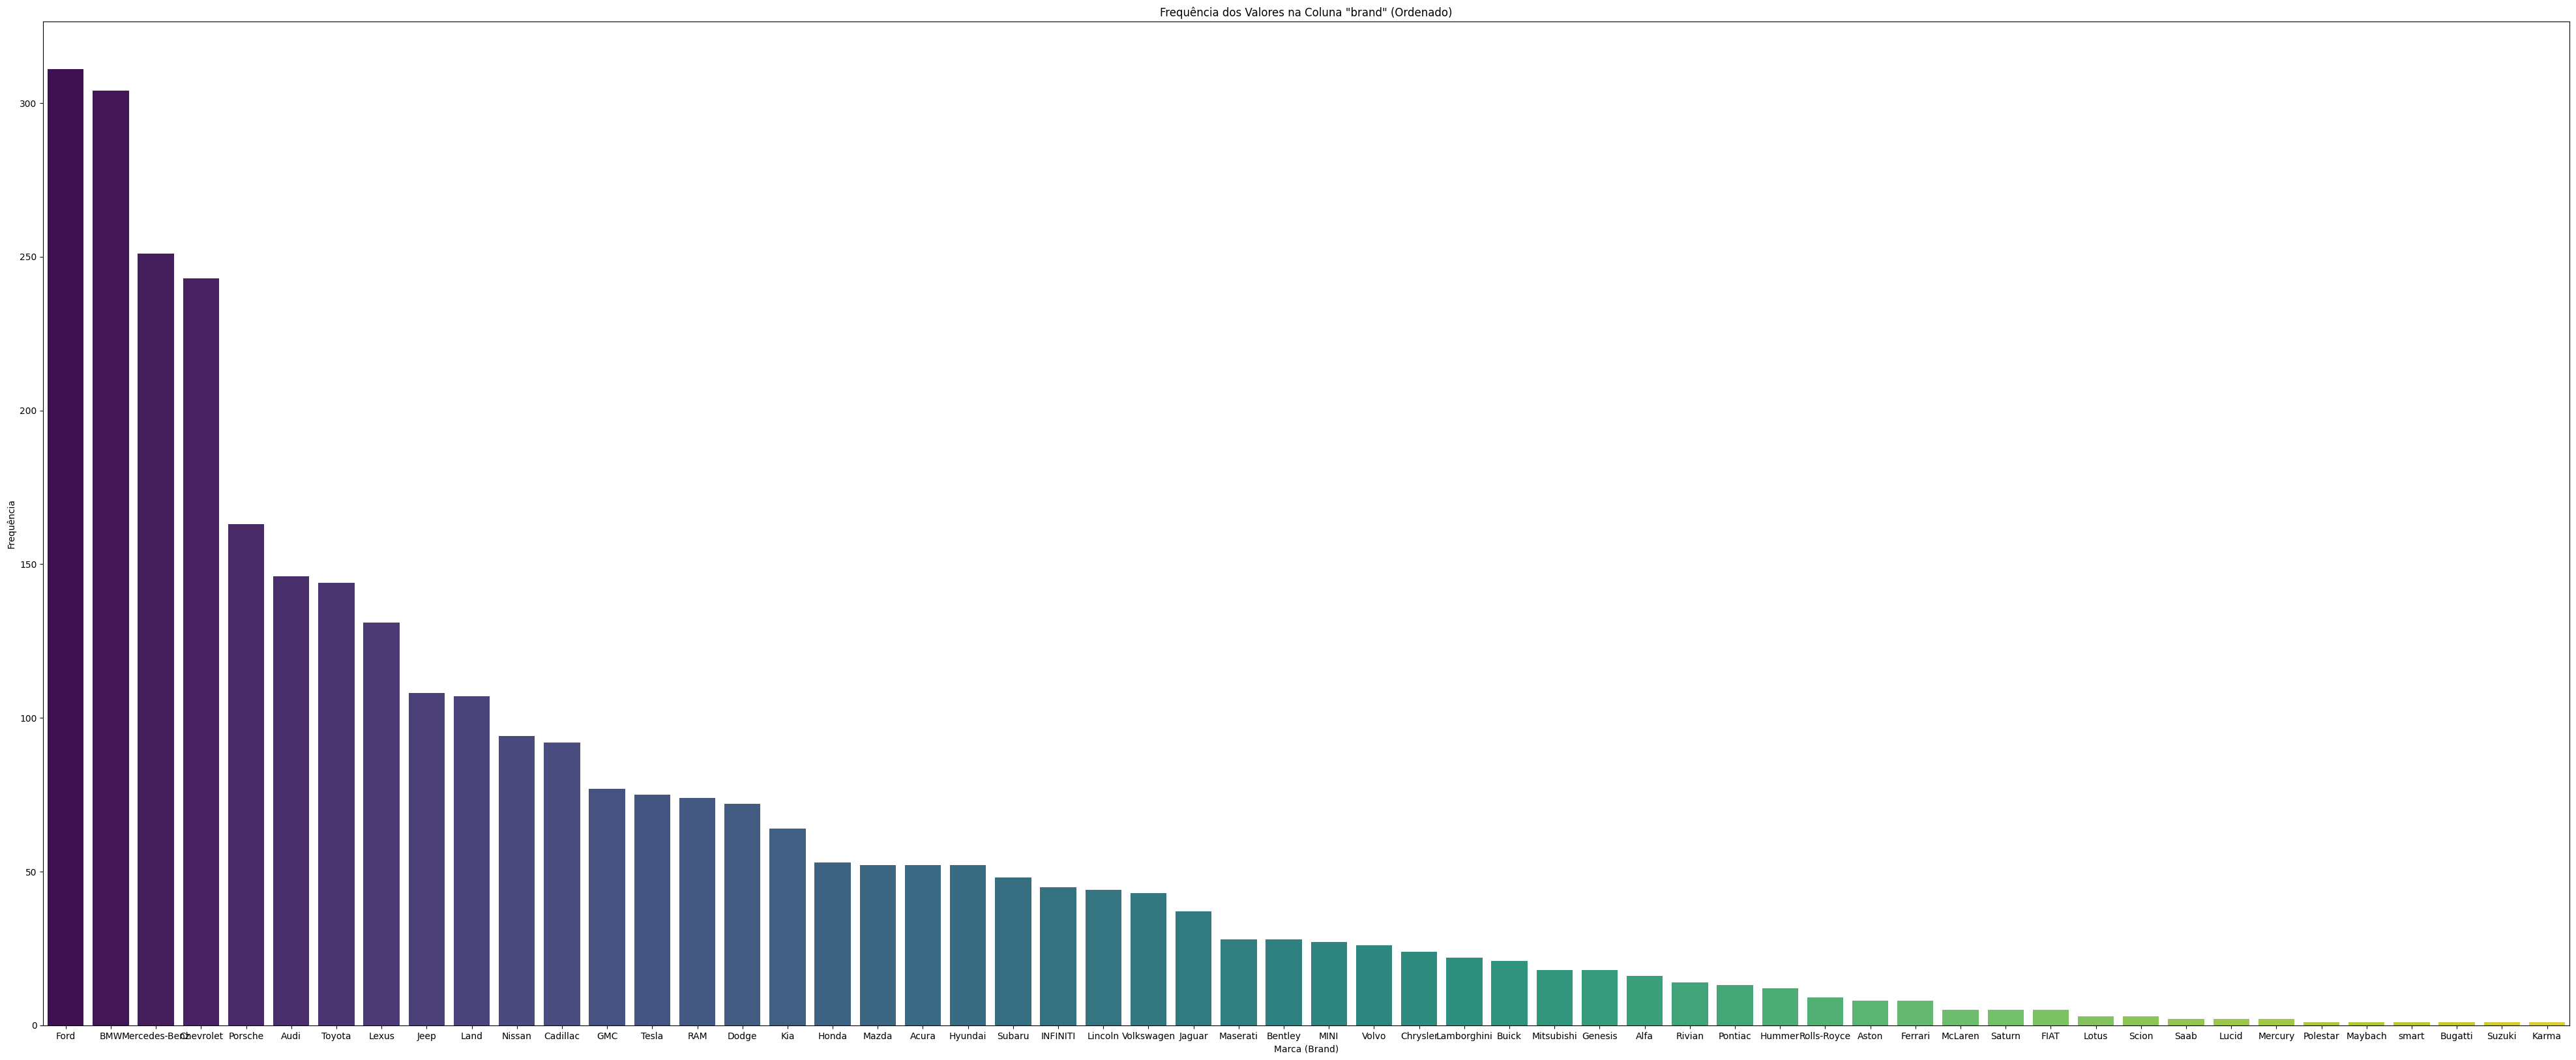

In [85]:
                        #BRAND
# Obter a contagem de cada valor na coluna "brand" e ordenar os resultados
brand_counts = df['brand'].value_counts().sort_values(ascending=False)

# Gráfico de frequência usando seaborn
plt.figure(figsize=(50, 20))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Frequência dos Valores na Coluna "brand" (Ordenado)')
plt.xlabel('Marca (Brand)')
plt.ylabel('Frequência')
plt.show()

In [86]:
                        #BRAND
#Como é possível verificar no gráfico de barras, a maior queda de valores é entre chevrolet para porshe. Portanto, vamos considerar os valores "Ford", "BMW", "Mercedes" e "Chevorlet", os outros valores vão ser populados com "Outro"
allowed_brands = ['Ford', 'Mercedes-Benz', 'BMW', 'Chevrolet']
df['brand'] = df['brand'].apply(lambda x: x if x in allowed_brands else 'Other')

In [87]:
                        #MODEL
#Como vimos na matriz da correlação, a marca não interfere no preço do automóvel, pelo que pode ser removida.
#drop the model column
df.drop('model', axis = 1, inplace = True)

In [88]:
                        #MODEL_YEAR
#Dividimos as datas tipo-  2000-2005 | 2005-2010 ... ?????
                 

In [89]:
                        #MILAGE
#Alterar o tipo da coluna para numero e converter de milhas para kilometros, para melhor compreensão.

# Alterar a coluna milage para float e depois converter para km
df['milage'] = df['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype(float)


# converter milhas para kilometros
mile_to_km = 0.621371
df['kilometers'] = df['milage'] / mile_to_km

# Arredondar os valores em 2 casas decimais
df['kilometers'] = df['kilometers'].round(0).astype(int)


In [90]:
                    #FUEL_TYPE
filtered_df = df[df['fuel_type'].isnull()]
print(filtered_df)

          brand  model_year    milage fuel_type  \
15        Other        2016  102260.0       NaN   
38          BMW        2015   26000.0       NaN   
53        Other        2019   27123.0       NaN   
81        Other        2023     299.0       NaN   
112       Other        2021   21600.0       NaN   
...         ...         ...       ...       ...   
3069      Other        2022   30000.0       NaN   
3079      Other        2022   15443.0       NaN   
3102  Chevrolet        2022   31000.0       NaN   
3131      Other        2020   88000.0       NaN   
3158      Other        2023    7414.0       NaN   

                                                 engine transmission ext_col  \
15          518.0HP Electric Motor Electric Fuel System  1-Speed A/T   White   
38    170.0HP 0.65L Electric Motor Electric Fuel System  1-Speed A/T   White   
53          425.0HP Electric Motor Electric Fuel System          A/T     Red   
81          835.0HP Electric Motor Electric Fuel System  1-Speed A/

In [91]:
                        #FUEL TYPE

# Juntar os hibridos todos, 
df.loc[df['fuel_type'].str.contains('Hybrid', na=False), 'fuel_type'] = 'Hybrid'
df.loc[df['fuel_type'].str.contains('–', na=False), 'fuel_type'] = 'No data'
df.loc[df['fuel_type'].str.strip() == '', 'fuel_type'] = 'No data'
df.loc[df['fuel_type'] == 'not supported', 'fuel_type'] = 'Hydrogen' # (só existe um carro com este valor: Toyota -Mirai Limited, movido a hidrogénio)
# Todos os valores que estão nulos são eletricos
df['fuel_type'].fillna('Eletric', inplace=True)


<Axes: >

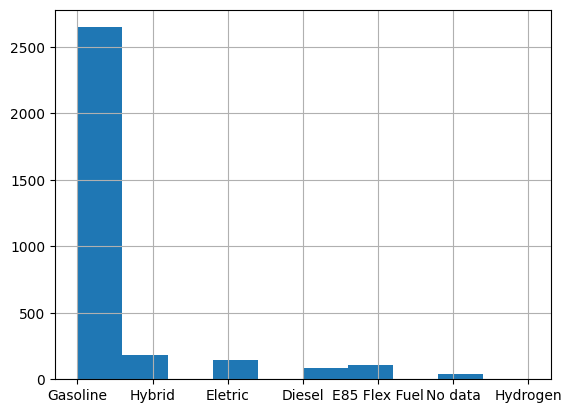

In [92]:
df["fuel_type"].hist()

In [93]:
                    #ENGINE

#Separar os valores do motor em "Horsepower", "Cilinders" and "Litres"
split_engine = df['engine'].str.split(' ',expand = True)

split_engine.loc[split_engine[0].str.contains('HP'), 'horsepower'] = split_engine.loc[split_engine[0].str.contains('HP'), 0].str.replace('HP', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 'cylinders'] = split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 2].str.replace('V', "").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinders'] = 6

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))])), 'cylinders'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))]))][1].astype(float)

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull())][2].str.replace('L', '').astype(float)


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull())][4].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)

df = pd.concat([df, split_engine[['horsepower', 'litres', 'cylinders']]], axis = 1)



df[['engine', 'horsepower', 'litres', 'cylinders']].head(100)

,engine,horsepower,litres,cylinders
0,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,285.0,3.6,6.0
1,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,270.0,3.5,6.0
2,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,208.0,2.5,4.0
3,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,260.0,2.4,4.0
4,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,301.0,4.6,8.0
...,...,...,...,...
95,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,449.0,4.7,8.0
96,175.0HP 3.9L V6 Cylinder Engine Gasoline Fuel,175.0,3.9,6.0
97,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,420.0,6.2,8.0
98,420.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,420.0,4.2,8.0


In [94]:
                #ENGINE
#substituimos os valores nulos pela media dos valores
df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)
df['litres'].fillna(df['litres'].mean(), inplace = True)
df['cylinders'].fillna(df['cylinders'].mean(), inplace = True)


In [95]:
                #TRANSMISSION
df[['transmission']].value_counts()

transmission                                                    
A/T                                                                 841
8-Speed A/T                                                         325
Transmission w/Dual Shift Mode                                      321
6-Speed A/T                                                         283
6-Speed M/T                                                         195
Automatic                                                           190
7-Speed A/T                                                         165
8-Speed Automatic                                                   140
10-Speed A/T                                                        102
5-Speed A/T                                                          68
4-Speed A/T                                                          59
9-Speed A/T                                                          57
6-Speed Automatic                                                    54

In [96]:
# TRANSMISSION
# Vamos manter apenas "Automatic", "Manual", "DCT", "No data"
df['transmission'] = df['transmission'].str.lower()

df.loc[df['transmission'].str.contains('automatic|a/t|at|auto|cvt'), 'transmission'] = 'Automatic'
df.loc[df['transmission'].str.contains('m/t|manual|mt'), 'transmission'] = 'Manual'
df.loc[df['transmission'].str.contains('dual shift mode'), 'transmission'] = 'DCT'
df.loc[df['transmission'].str.contains('–|2|f|7-speed|variable'), 'transmission'] = 'No data'

# Preencher valores nulos com 'No data'
df['transmission'].fillna('No data', inplace=True)


<Axes: >

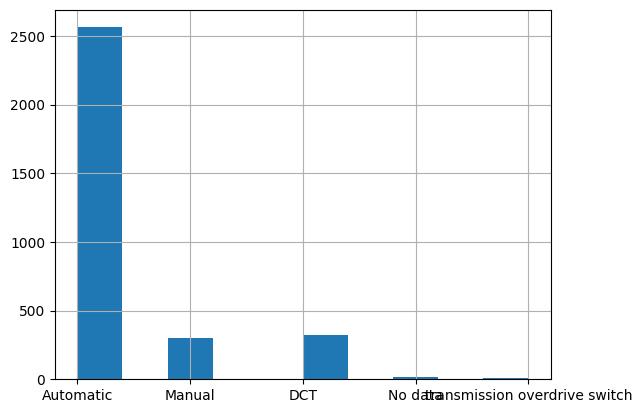

In [97]:
df["transmission"].hist()

In [98]:
                #EXT_COLOR
# Substituir todos os valores que não são "white" ou "black" por "other"
# meter os contains "preto e branco" -> falta fazer
df.loc[~df['ext_col'].isin(['White', 'Black']), 'ext_col'] = 'Other'

In [99]:
df[['int_col']].describe()

,int_col
count,3207
unique,140
top,Black
freq,1610


In [100]:
                #INT_COLOR
# Substituir todos os valores que não são "white" ou "black" por "other"
# meter os contains "preto e branco" -> falta fazer
df.loc[~df['int_col'].isin(['Beige', 'Black', "Gray"]), 'int_col'] = 'Other'

In [101]:
                #CLEAN_TITLE
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['clean_title'].fillna("No data", inplace=True)


In [102]:
                #ACCIDENT
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['accident'].fillna("No data", inplace=True)

In [103]:
#------------------------------------------OUTLIERS---------------------------------------------------

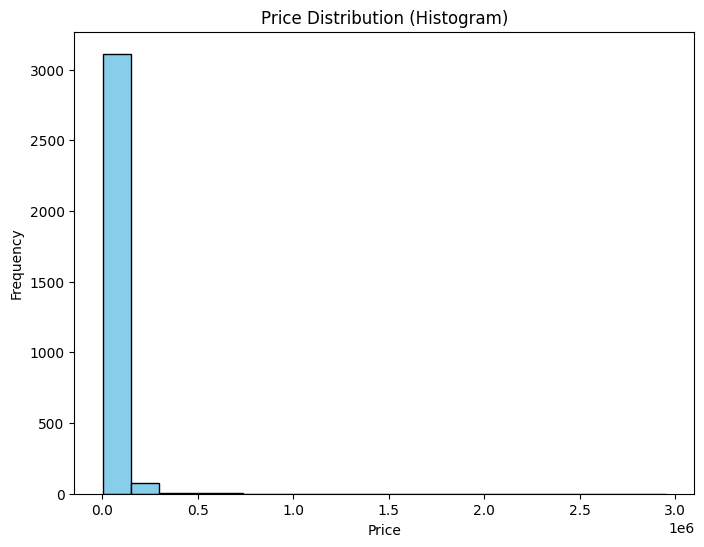

In [104]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [105]:
 #INSIGHTS

#Above Histogram shows that most cars lie in the lower range of price.

#The data has too many outliers as seen from the above graph and hence needs to be removed - to get near normal distribution.

C:\Users\guilh\AppData\Local\Temp\ipykernel_17012\4062617948.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], color='purple', shade=True)


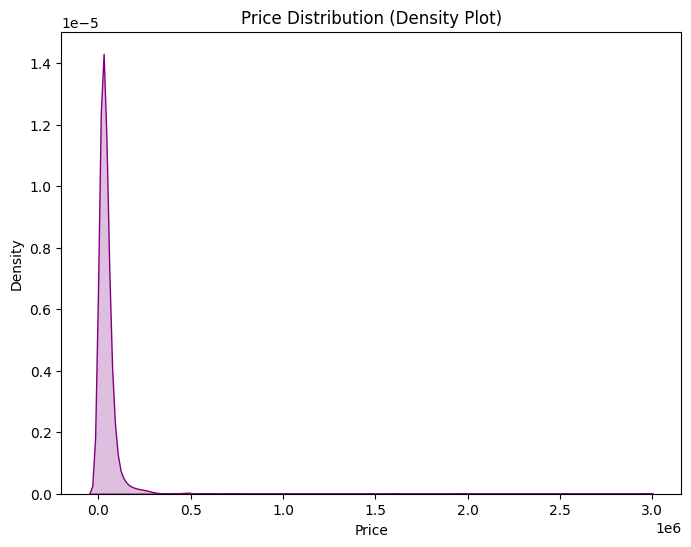

In [106]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['price'], color='purple', shade=True)
plt.title('Price Distribution (Density Plot)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [107]:
df['price'].describe()

count    3.207000e+03
mean     4.487024e+04
std      8.382969e+04
min      2.000000e+03
25%      1.705000e+04
50%      3.169800e+04
75%      4.999650e+04
max      2.954083e+06
Name: price, dtype: float64

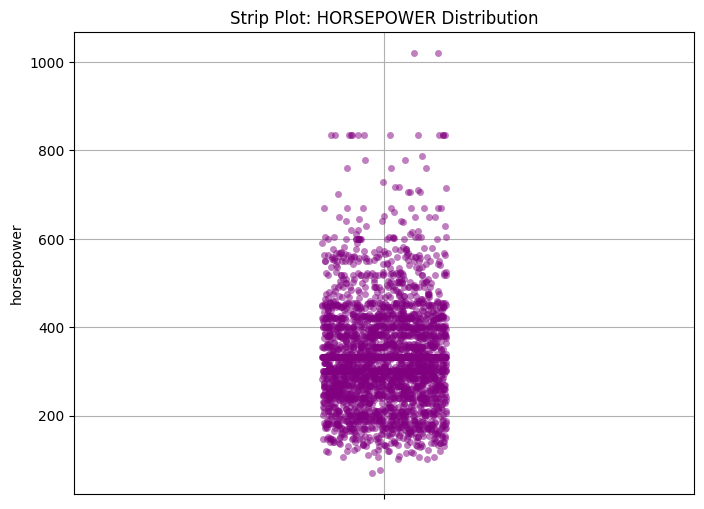

In [108]:
#---------------------------------HORSEPOWER------------------------
# Create a strip plot for the 'HORSEPOWER' variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='horsepower', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: HORSEPOWER Distribution')
plt.ylabel('horsepower')
plt.grid(True)
plt.show()

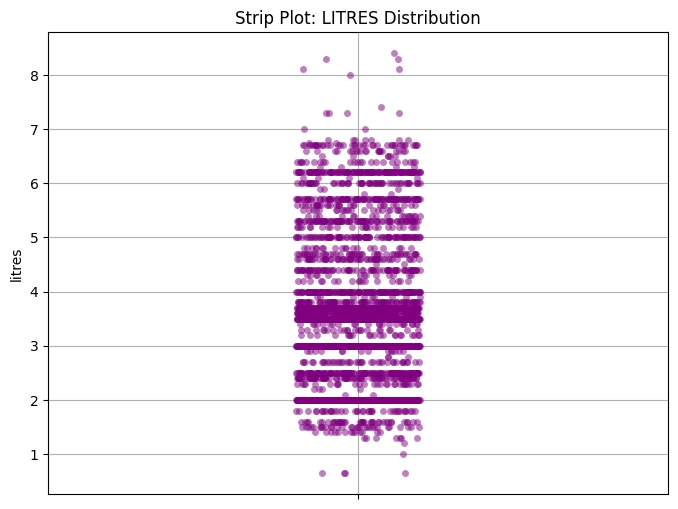

In [109]:
#---------------------------------LITRES------------------------
# Create a strip plot for the 'LITRES' variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='litres', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: LITRES Distribution')
plt.ylabel('litres')
plt.grid(True)
plt.show()

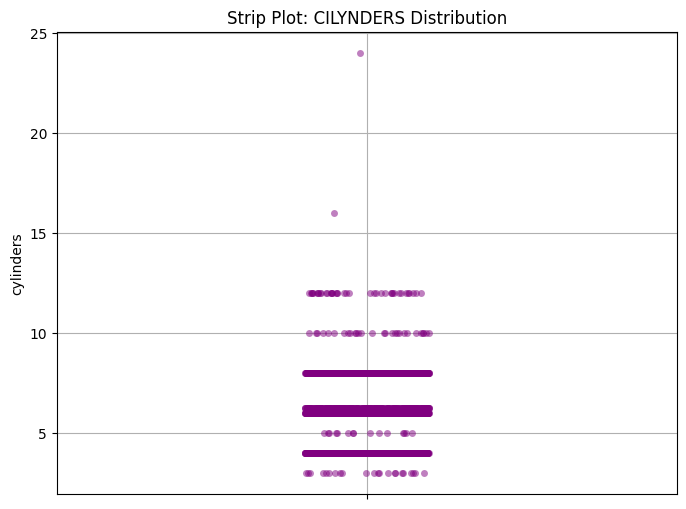

In [110]:
#---------------------------------CILYNDERS------------------------
# Create a strip plot for the 'CILYNDERS' variable
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, y='cylinders', jitter=True, color='purple', alpha=0.5)
plt.title('Strip Plot: CILYNDERS Distribution')
plt.ylabel('cylinders')
plt.grid(True)
plt.show()

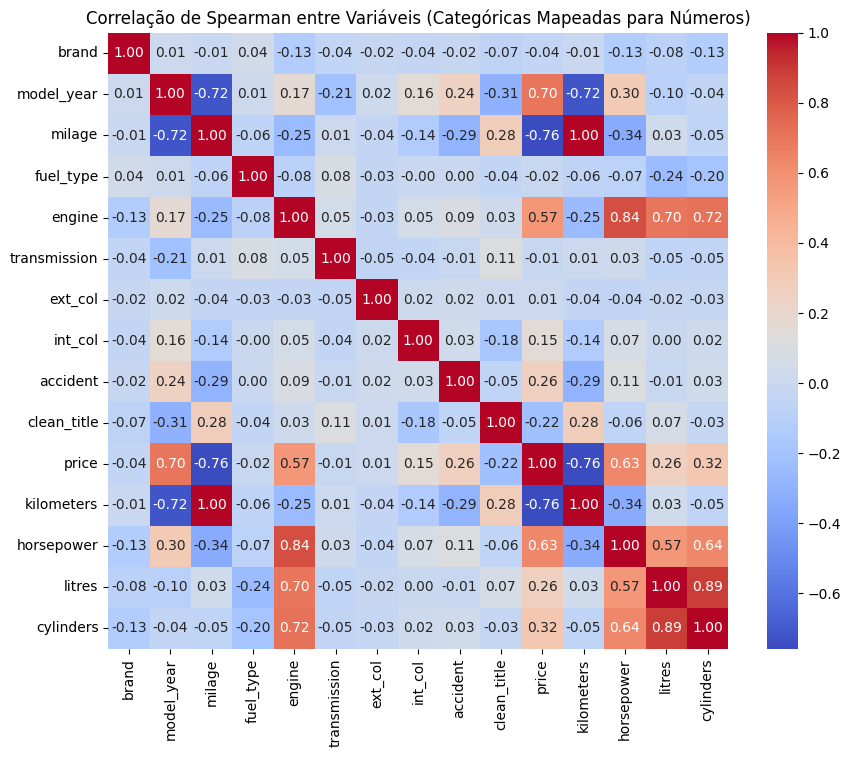

In [111]:
# Seleciona apenas as colunas não numéricas
categorical_columns = df.select_dtypes(include='object').columns

# Mapeia as categorias para números
for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

# Calcule a matriz de correlação de Spearman
correlation_matrix = df.corr(method='spearman')

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Spearman entre Variáveis (Categóricas Mapeadas para Números)')
plt.show()

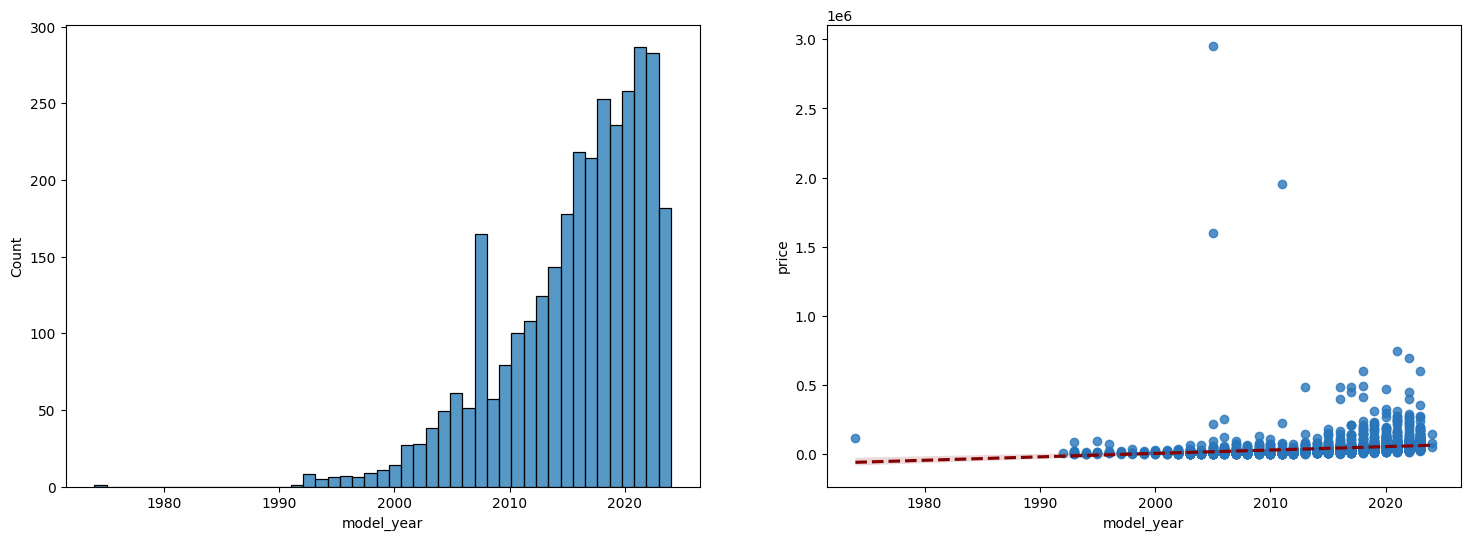

In [112]:
#If we contrast the year of the model with the price, we can see that a positive correlation exist between these two features. In general, the higher the year of the model, the higher the price will be.
fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['model_year'], ax = axes[0])
sns.regplot(data = df, x = 'model_year', y = 'price', color = 'red',
            scatter_kws = {'color': sns.xkcd_rgb['bluish']},
            line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[1])

plt.show()



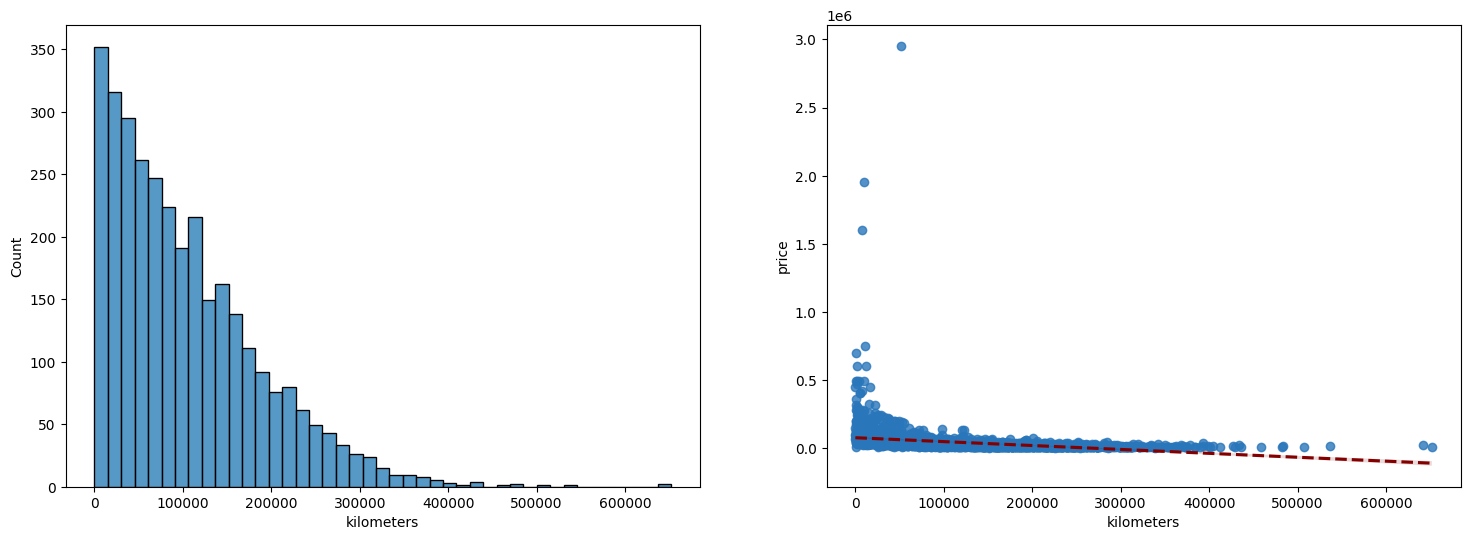

In [113]:
#As we can expect, we can see that a higher milage means a lower price. Naturally, a car that has a lot of milage probably does not have good efficiency or it is in the best condition, so the price must be lower to be more attractive for sale.

fig, axes = plt.subplots(1,2, figsize = (18,6))

sns.histplot(data = df['kilometers'], ax = axes[0])
sns.regplot(data = df, x = 'kilometers', y = 'price', color = 'red',
            scatter_kws = {'color': sns.xkcd_rgb['bluish']},
            line_kws = {'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax = axes[1])

plt.show()



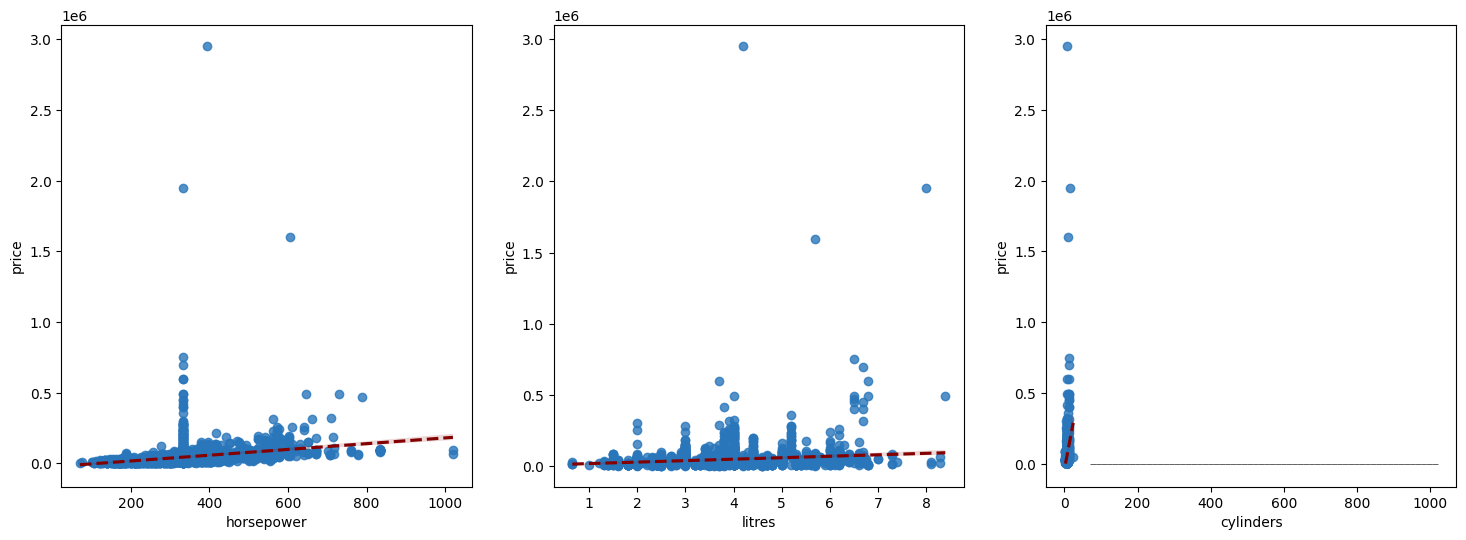

In [114]:
#From all the engine features, we see that horsepower holds the best correlation with the price, which we can see is positive. The other features don't give us much insight in relation to price.

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for 'horsepower'
sns.histplot(data=df['horsepower'], ax=axes[2])
sns.regplot(data=df, x='horsepower', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[0])

# Plot for 'litres'
sns.histplot(data=df['litres'], ax=axes[2])
sns.regplot(data=df, x='litres', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[1])

# Plot for 'cylinders'
sns.histplot(data=df['cylinders'], ax=axes[2])
sns.regplot(data=df, x='cylinders', y='price', color='red',
            scatter_kws={'color': sns.xkcd_rgb['bluish']},
            line_kws={'color': sns.xkcd_rgb['dark red'], 'linestyle': '--'}, ax=axes[2])

plt.show()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3207 non-null   int8   
 1   model_year    3207 non-null   int64  
 2   milage        3207 non-null   float64
 3   fuel_type     3207 non-null   int8   
 4   engine        3207 non-null   int16  
 5   transmission  3207 non-null   int8   
 6   ext_col       3207 non-null   int8   
 7   int_col       3207 non-null   int8   
 8   accident      3207 non-null   int8   
 9   clean_title   3207 non-null   int8   
 10  price         3207 non-null   int64  
 11  kilometers    3207 non-null   int32  
 12  horsepower    3207 non-null   float64
 13  litres        3207 non-null   float64
 14  cylinders     3207 non-null   float64
dtypes: float64(4), int16(1), int32(1), int64(2), int8(7)
memory usage: 191.2 KB
